# Imports

In [ ]:
!pip install python-chess==0.31.3

  Using cached python_chess-0.31.3-py3-none-any.whl (134 kB)


In [ ]:
pip install tensorflow

  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\saaransh\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.4-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.7.2-py3-none-any.whl (34 kB)

  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  U

In [ ]:
pip install stockfish

  Using cached stockfish-3.14.0-py3-none-any.whl (6.2 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import chess

import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.utils as utils
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.callbacks as callbacks

from stockfish import Stockfish

stockfish = Stockfish(r"stockfish_13_win_x64_bmi2/stockfish_13_win_x64_bmi2")
# stockfish.set_skill_level(1)
stockfish.set_elo_rating(500)
stockfish.set_depth(1)

# Loading DataSet

In [ ]:
def get_dataset():
    container = np.load('dataset.npz')
    b, v = container['b'], container['v']
    v = np.asarray(v / abs(v).max() / 2 + 0.5, dtype=np.float32) # normalization (0 - 1)
    return b, v


x_train, y_train = get_dataset()
x_train = np.swapaxes(x_train, -1, 1)
print(x_train.shape)
print(y_train.shape)

(1500000, 8, 8, 14)
(1500000,)


# Building the model

In [ ]:
def build_model(conv_size, conv_depth):
    board3d = layers.Input(shape=(8, 8, 14))

    x = board3d
#     x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_first')(board3d)
    for _ in range(conv_depth):
#         previous = x
#         x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_first')(x)
#         x = layers.BatchNormalization()(x)
#         x = layers.Activation('relu')(x)
#         x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', data_format='channels_first')(x)
#         x = layers.BatchNormalization()(x)
#         x = layers.Add()([x, previous])
#         x = layers.Activation('relu')(x)
        x = layers.Conv2D(filters=conv_size, kernel_size=3, padding='same', activation='relu', data_format='channels_last')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, 'relu')(x)
    x = layers.Dense(1, 'sigmoid')(x)

    return models.Model(inputs=board3d, outputs=x)

In [ ]:
model = build_model(32, 4)
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8, 8, 14)]        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 32)          4064      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate= 0.0005), loss='mean_squared_error')
model.summary()
model.fit(x_train, y_train,
          batch_size=2048,
          epochs=500,
          verbose=1,
          validation_split=0.1,
          callbacks=[callbacks.ReduceLROnPlateau(monitor='loss', patience=10),
                     callbacks.EarlyStopping(monitor='loss', patience=15, min_delta=1e-4)])

model.save('model_three.h5')

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 8, 8, 14)]        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 32)          4064      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [ ]:
model.save('model_try.h5')

In [ ]:
import tensorflow

In [ ]:
tensorflow.__version__

'2.4.1'

In [ ]:
mymodel = models.load_model('fiftyepochs.h5')
mymodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8, 8, 14)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 8, 8, 32)          4064      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

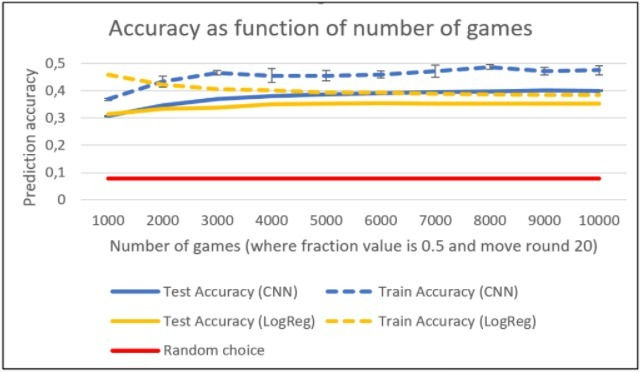

In [ ]:
squares_index = {
  'a': 0,
  'b': 1,
  'c': 2,
  'd': 3,
  'e': 4,
  'f': 5,
  'g': 6,
  'h': 7
}


# example: h3 -> 17
def square_to_index(square):
  letter = chess.square_name(square)
  return 8 - int(letter[1]), squares_index[letter[0]]


def split_dims(board):
  # this is the 3d matrix
  board3d = np.zeros((8, 8, 14), dtype=np.int8)

  # here we add the pieces's view on the matrix
  for piece in chess.PIECE_TYPES:
    for square in board.pieces(piece, chess.WHITE):
      idx = np.unravel_index(square, (8, 8))
      board3d[7 - idx[0]][idx[1]][piece - 1] = 1
    for square in board.pieces(piece, chess.BLACK):
      idx = np.unravel_index(square, (8, 8))
      board3d[7 - idx[0]][idx[1]][piece + 5] = 1

  # add attacks and valid moves too
  # so the network knows what is being attacked
  aux = board.turn
  board.turn = chess.WHITE
  for move in board.legal_moves:
      i, j = square_to_index(move.to_square)
      board3d[i][j][12] = 1
  board.turn = chess.BLACK
  for move in board.legal_moves:
      i, j = square_to_index(move.to_square)
      board3d[i][j][13] = 1
  board.turn = aux

  return board3d

In [ ]:
# used for the minimax algorithm
def minimax_eval(board):
  board3d = split_dims(board)
  board3d = np.expand_dims(board3d, 0)
  return mymodel.predict(board3d)[0][0]

In [ ]:
def minimax(board, depth, alpha, beta, maximizing_player):
  if depth == 0 or board.is_game_over():
    return minimax_eval(board)

  if maximizing_player:
    max_eval = -np.inf
    for move in board.legal_moves:
      board.push(move)
      eval = minimax(board, depth - 1, alpha, beta, False)
      board.pop()
      max_eval = max(max_eval, eval)
      alpha = max(alpha, eval)
      if beta <= alpha:
        break
    return max_eval
  else:
    min_eval = np.inf
    for move in board.legal_moves:
      board.push(move)
      eval = minimax(board, depth - 1, alpha, beta, True)
      board.pop()
      min_eval = min(min_eval, eval)
      beta = min(beta, eval)
      if beta <= alpha:
        break
    return min_eval

In [ ]:
# this is the actual function that gets the move from the neural network
def get_ai_move(board, depth, color):
    best_move = None
    max_eval = -np.inf
    min_eval = np.inf



    for move in board.legal_moves:
        board.push(move)
        eval = minimax(board, depth - 1, -np.inf, np.inf, False)
        board.pop()
        if color == "white":
            if eval > max_eval:
              max_eval = eval
              best_move = move
        elif color == "black":
            if eval < min_eval:
              min_eval = eval
              best_move = move

    return best_move

In [ ]:
board = chess.Board()

counter = 1

while True:
    print("Move:",counter, '-'*10)
    counter += 1

    # Get Move from Model
    move = get_ai_move(board, 2, "white")
    board.push(move)
    print(f'\n{board}')
    if board.is_game_over():
      break

    # Get Move from Stockfish

    fen = board.fen()
    stockfish.set_fen_position(fen)
    move = stockfish.get_best_move()
    move = chess.Move.from_uci(move)
    board.push(move)
    print(f'\n{board}')
    if board.is_game_over():
      break
    print()

Move: 1 ----------

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R

r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . . . . .
. . . . P . . .
P P P P . P P P
R N B Q K B N R

Move: 2 ----------

r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . . . Q .
. . . . P . . .
P P P P . P P P
R N B . K B N R

r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . . . Q .
. . . . P . . .
P P P P . P P P
R N B . K B N R

Move: 3 ----------

r . b q k b n r
p p p p . p p p
. . n . . . . .
. . . . p . . .
. . . . . . Q .
. . . . P N . .
P P P P . P P P
R N B . K B . R

r . b q k b n r
p p p p . p p .
. . n . . . . .
. . . . p . . p
. . . . . . Q .
. . . . P N . .
P P P P . P P P
R N B . K B . R

Move: 4 ----------

r . b q k b n r
p p p p . p p .
. . n . . . . .
. . . . p Q . p
. . . . . . . .
. . . . P N . .
P P P P . P P P
R N B . K B . R

r . b q k b . r
p


. . . . r . . .
. . p . . . . .
p . P . . b . .
. . . k . r . .
. . . . . . . .
B P P . . . R P
P . . P . P . .
R . . . . K . .

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . k . r b .
. . . . . . . .
B P P . . . R P
P . . P . P . .
R . . . . K . .

Move: 32 ----------

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . k . r b .
. . P . . . . .
B P . . . . R P
P . . P . P . .
R . . . . K . .

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . . . r b .
. . P k . . . .
B P . . . . R P
P . . P . P . .
R . . . . K . .

Move: 33 ----------

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . . . r b .
. . P k . . R .
B P . . . . . P
P . . P . P . .
R . . . . K . .

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . . . . b .
. . P k . r R .
B P . . . . . P
P . . P . P . .
R . . . . K . .

Move: 34 ----------

. . . . r . . .
. . p . . . . .
p . P . . . . .
. . . . . . R .
. . P k . r . .
B P . . . . . P
P . . P . P . .
R . . . . K . .

. r . . . . . .
. . p . . . . .
p

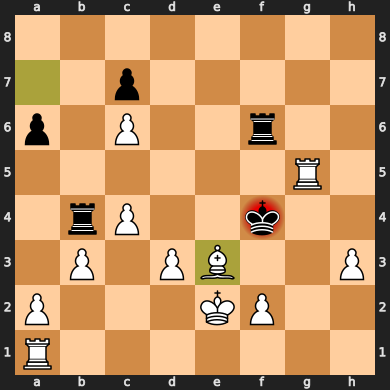

In [ ]:
board